# Desafio IPQ - Análise de Microdados SINASC 2016 

## Sumário
1. [Distribuição do Código e Nome da UF de Nascimento](#1-distribuicao-do-codigo-e-nome-da-uf-de-nascimento)
2. [Número de Municípios por UF de Nascimento](#2-numero-de-municipios-por-uf-de-nascimento)
3. [Três Menores e Três Maiores Idades das Mães](#3-tres-menores-e-tres-maiores-idades-das-maes)
4. [Distribuição de Frequência da Idade das Mães na Bahia](#4-distribuicao-de-frequencia-da-idade-das-maes-na-bahia)
5. [Distribuição da Variável ‘Peso’](#5-distribuicao-da-variavel-peso)
6. [Bebês Pesando Menos de 2000 Gramas](#6-bebes-pesando-menos-de-2000-gramas)
7. [Estabelecimentos de Saúde por UF](#7-estabelecimentos-de-saude-por-uf)
8. [Crianças Nascidas em Hospital na Bahia](#8-criancas-nascidas-em-hospital-na-bahia)
9. [Crianças Nascidas em Casa na Bahia](#9-criancas-nascidas-em-casa-na-bahia)
10. [Distribuição de Nascimentos por Mês na Bahia](#10-distribuicao-de-nascimentos-por-mes-na-bahia)
11. [Distribuição de Escolaridade de Mães Solteiras, Negras e Pardas](#11-distribuicao-de-escolaridade-de-maes-solteiras-negras-e-pardas)
12. [Porcentagem de Mulheres Casadas com Parto Vaginal Precoce](#12-porcentagem-de-mulheres-casadas-com-parto-vaginal-precoce)
13. [Porcentagem de Mulheres Casadas com Parto Cesárea Precoce](#13-porcentagem-de-mulheres-casadas-com-parto-cesarea-precoce)


## Importação das Bibliotecas e Carregamento dos Dados


In [1]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime

In [2]:
# Importação dos dados
sinasc_dados = '../data/sinasc_2016.csv'
municipios_uf = '../data/municipios.csv'

# Carregar dados em data frames
sinasc_df = pd.read_csv(sinasc_dados, sep=',', encoding='ISO-8859-1')
municipios_df = pd.read_csv(municipios_uf, sep=';', encoding='ISO-8859-1')

In [3]:
# Exibir as primeiras linhas dos dados em municipios_df para verificação
municipios_df.head()

,CÓDIGO DO MUNICÍPIO - TOM,CÓDIGO DO MUNICÍPIO - IBGE,MUNICÍPIO - TOM,MUNICÍPIO - IBGE,UF
0,1,1100106,GUAJARÁ-MIRIM,Guajará-Mirim,RO
1,2,1100379,ALTO ALEGRE DOS PARECIS,Alto Alegre dos Parecis,RO
2,3,1100205,PORTO VELHO,Porto Velho,RO
3,4,1100452,BURITIS,Buritis,RO
4,5,1100122,JI-PARANÁ,Ji-Paraná,RO


In [4]:
# Exibir as primeiras linhas dos dados em sinasc_df para verificação
sinasc_df.head(70)

,DTNASC,CODMUNNASC,CODMUNRES,DTNASCMAE,CODESTAB,RACACORMAE,LOCNASC,PARTO,PESO,ESCMAE2010,ESTCIVMAE,GESTACAO,SEMAGESTAC,SERIESCMAE,IDADEPAI,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,CONSPRENAT
0,19022016,110001,110001,18121987.0,2679477.0,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0
1,22022016,110001,110001,17011998.0,NaN,5.0,4,1.0,1800,1.0,5.0,5.0,37.0,3.0,20.0,1.0,2.0,3.0,1.0,5.0
2,13022016,110001,110001,15021986.0,2679477.0,5.0,1,1.0,3545,1.0,5.0,5.0,39.0,NaN,38.0,1.0,2.0,3.0,1.0,7.0
3,5022016,110001,110001,7041986.0,2679477.0,5.0,1,1.0,3550,1.0,9.0,5.0,39.0,3.0,NaN,1.0,2.0,3.0,1.0,6.0
4,25022016,110001,110001,18121989.0,2679477.0,1.0,1,1.0,2obeso565,3.0,5.0,5.0,38.0,NaN,34.0,1.0,2.0,3.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,3022016,110002,110002,NaN,2515598.0,NaN,1,2.0,2obeso820,NaN,5.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2022016,110002,110002,NaN,2515598.0,NaN,1,2.0,4950,NaN,5.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2012016,110002,110094,NaN,2515504.0,NaN,1,2.0,2obeso860,NaN,5.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2012016,110002,110002,NaN,2515504.0,NaN,1,2.0,3780,NaN,4.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Distribuição do Código e Nome da UF de Nascimento

In [5]:
# Extrair o código da UF a partir do código do munícipio 'CÓDIGO DO MUNICÍPIO - IBGE'
municipios_df['UF_CODIGO'] = municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'].astype(str).str[:2]

In [6]:
# Padronizar o formato dos códigos
# Garantir que CODMUNNASC tenha 6 posições
sinasc_df['CODMUNNASC'] = sinasc_df['CODMUNNASC'].astype(str).str.zfill(6)

# Remover a unidade do CÓDIGO DO MUNICÍPIO - IBGE e garantir 6 posições
municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'] = municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'].astype(str).str[:-1]
municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'] = municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'].str.zfill(6)

In [7]:
# Fazer a junção das duas tabelas para incluir código e nome de cada UF
sinasc_df = sinasc_df.merge(
    municipios_df[['CÓDIGO DO MUNICÍPIO - IBGE', 'UF', 'UF_CODIGO']],
    left_on='CODMUNNASC',
    right_on='CÓDIGO DO MUNICÍPIO - IBGE',
    how='left'
)
sinasc_df.rename(columns={'UF': 'UF_NOME'}, inplace=True)

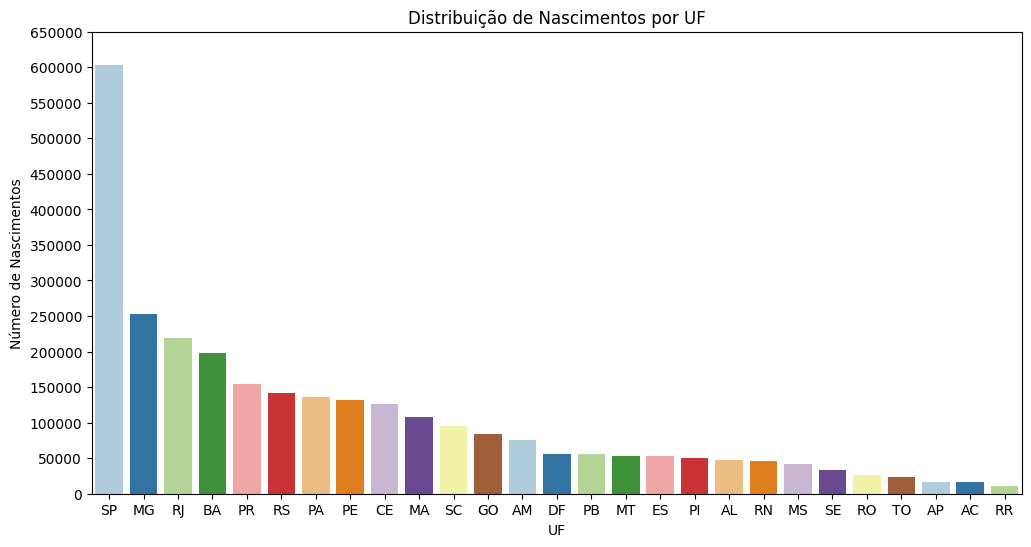

In [8]:
# Contar a distribuição das UFs
uf_distribuicao = sinasc_df['UF_NOME'].value_counts().reset_index()
uf_distribuicao.columns = ['UF', 'Número de Nascimentos']

# Definir uma paleta de cores com o número correto de cores
paleta = sns.color_palette('Paired', n_colors=len(uf_distribuicao))

# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Número de Nascimentos', data=uf_distribuicao, palette=paleta, hue='UF', legend=False)
plt.xticks(rotation=0)
plt.xlabel('UF')
plt.ylabel('Número de Nascimentos')
plt.title('Distribuição de Nascimentos por UF')

# Definir os ticks do eixo y com intervalo de 50.000
max_y = uf_distribuicao['Número de Nascimentos'].max()
plt.yticks(np.arange(0, max_y + 50000, 50000))

plt.show()

In [9]:
sinasc_df.columns.values

array(['DTNASC', 'CODMUNNASC', 'CODMUNRES', 'DTNASCMAE', 'CODESTAB',
       'RACACORMAE', 'LOCNASC', 'PARTO', 'PESO', 'ESCMAE2010',
       'ESTCIVMAE', 'GESTACAO', 'SEMAGESTAC', 'SERIESCMAE', 'IDADEPAI',
       'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI',
       'CONSPRENAT', 'CÓDIGO DO MUNICÍPIO - IBGE', 'UF_NOME', 'UF_CODIGO'],
      dtype=object)

## 2. Número de Municípios por UF de Nascimento

In [10]:
# Contar a distribuição de municípios por UF
coluna_in_uf_nome = sinasc_df.groupby('UF_NOME')['CODMUNNASC'].nunique().reset_index()
coluna_in_uf_nome.columns = ['UF', 'Número de Municípios']

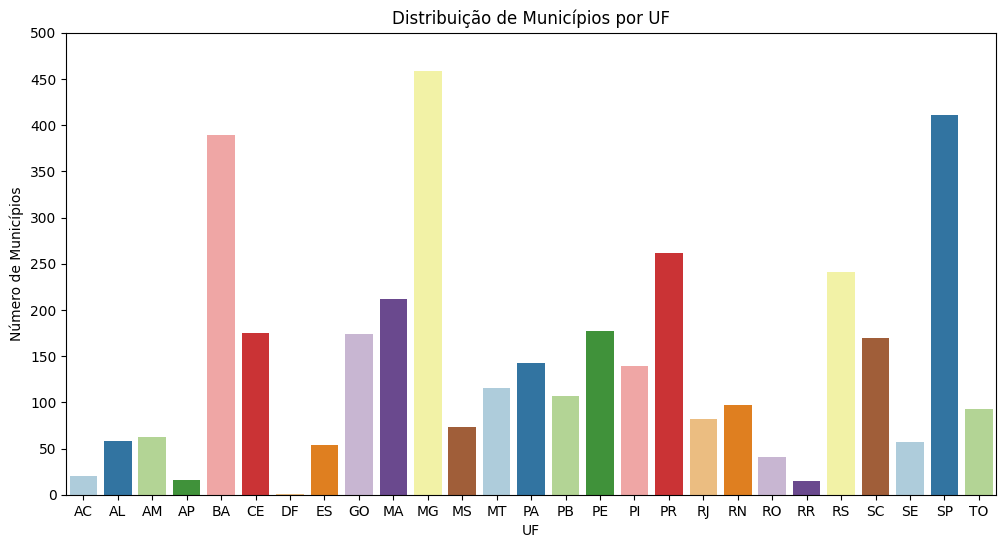

In [11]:
# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Número de Municípios', data=coluna_in_uf_nome, palette=paleta, hue='UF', legend=False)
plt.xticks(rotation=0)
plt.xlabel('UF')
plt.ylabel('Número de Municípios')
plt.title('Distribuição de Municípios por UF')

# Definir os ticks do eixo y com intervalo de 50
max_y = coluna_in_uf_nome['Número de Municípios'].max()
plt.yticks(np.arange(0, max_y + 50, 50))

plt.show()

## 3. Três Menores e Três Maiores Idades das Mães

### Durante a análise das informações, constatei idades mínimas negativas ou zeradas e idades máximas com valores até de 72 anos, o que pode indicar inconsistência dos dados.

### Fiz algumas pesquisas para localizar alguma notícia de nascidos em 2016 com mulheres mais velhas e não encontrei menção a esse fato. O que encontrei foi uma notícia de 11/04/2018 [aqui](https://g1.globo.com/mg/minas-gerais/noticia/mulher-de-64-anos-da-a-luz-a-uma-menina-em-maternidade-de-belo-horizonte.ghtml#) (consultada em 25/07/2024), onde a idade da gestante ao dar à luz era de 64 anos. Como critério para a nossa análise, vamos considerar a idade mais velha como 64 anos.

### Para determinar a idade mais nova, fiz algumas pesquisas e encontrei esta notícia de 15/09/2022 [aqui](https://oglobo.globo.com/brasil/noticia/2022/09/gravida-pela-2a-vez-aos-11-anos-menina-e-vitima-de-negligencia-dos-pais-quer-aborto-e-nao-e-caso-isolado-diz-conselheira.ghtml) (consultada em 25/07/2024). Nessa reportagem, não é informado se a menina chegou a dar à luz, mas menciona que a gravidez é a segunda com 11 anos. Portanto, acredito que não é impossível ocorrerem casos com idade semelhante. Vamos adotar como critério idades a partir de 10 anos.


In [12]:
# Função para ajustar o formato da data
def formatar_data(value):
    if pd.isna(value):
        return pd.NaT  # Retorna um valor nulo para datas inválidas
    try:
        # Converter para string, remover o '.0' e garantir 8 dígitos
        date_str = str(int(value)).zfill(8)
        return pd.to_datetime(date_str, format='%d%m%Y')
    except ValueError:
        return pd.NaT  # Retorna um valor nulo se houver um erro de conversão

# Aplicar a função para converter a coluna DTNASCMAE
sinasc_df['DTNASCMAE'] = sinasc_df['DTNASCMAE'].apply(formatar_data)

# Converter a coluna DTNASC diretamente
sinasc_df['DTNASC'] = pd.to_datetime(sinasc_df['DTNASC'], format='%d%m%Y', errors='coerce')

In [13]:
# Calcular a idade das mães no ano de 2016
sinasc_df['IDADEMAE_2016'] = 2016 - sinasc_df['DTNASCMAE'].dt.year

# Ajustar a idade para os casos onde o aniversário ainda não ocorreu em 2016 com base na data de nascimento do bebê
sinasc_df['IDADEMAE_2016'] = sinasc_df.apply(
    lambda row: row['IDADEMAE_2016'] - 1 if pd.notna(row['DTNASCMAE']) and pd.notna(row['DTNASC']) and (row['DTNASCMAE'].month, row['DTNASCMAE'].day) > (row['DTNASC'].month, row['DTNASC'].day) else row['IDADEMAE_2016'],
    axis=1
)

In [14]:
# # Filtrar idades entre 10 e 64 anos
# sinasc_df = sinasc_df[(sinasc_df['IDADEMAE_2016'] >= 10) & (sinasc_df['IDADEMAE_2016'] <= 64)]
# Filtrar idades entre 10 e 64 anos
sinasc_df = sinasc_df[(sinasc_df['IDADEMAE_2016'] >= 10) & (sinasc_df['IDADEMAE_2016'] <= 64)]

# Selecionar as três menores e três maiores idades únicas das mães
tres_menores_idades = np.sort(sinasc_df['IDADEMAE_2016'].unique())[:3]
tres_maiores_idades = np.sort(sinasc_df['IDADEMAE_2016'].unique())[-3:]

print("Três menores idades únicas:", tres_menores_idades)
print("Três maiores idades únicas:", tres_maiores_idades)


Três menores idades únicas: [10. 11. 12.]
Três maiores idades únicas: [62. 63. 64.]


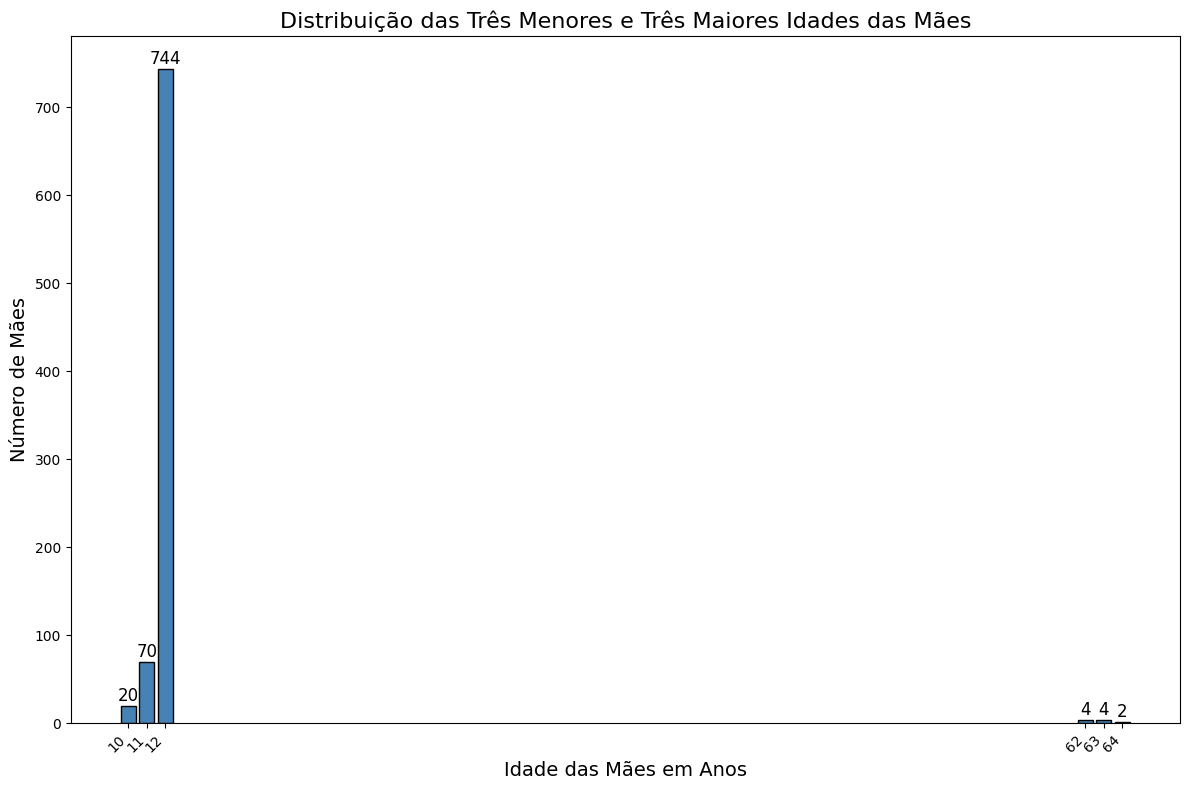

In [15]:
# Dados para o gráfico
idades_unicas = np.concatenate([tres_menores_idades, tres_maiores_idades])
quantidades = [sinasc_df[sinasc_df['IDADEMAE_2016'] == idade].shape[0] for idade in idades_unicas]

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(idades_unicas, quantidades, color='steelblue', edgecolor='black')

# Adicionar rótulos para as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

# Ajustar a posição dos rótulos do eixo X
plt.xticks(idades_unicas, rotation=45, ha='right')

# Adicionar título e rótulos dos eixos
plt.title('Distribuição das Três Menores e Três Maiores Idades das Mães', fontsize=16)
plt.xlabel('Idade das Mães em Anos', fontsize=14)
plt.ylabel('Número de Mães', fontsize=14)

# Exibir o gráfico
plt.tight_layout()
plt.show()

## 4. Qual é a distribuição de frequência da idade das mães na Bahia?

In [16]:
# Selecionar nascimentos no estado da Bahia
nascidos_na_bahia = sinasc_df[sinasc_df['UF_CODIGO'] == '29']

In [17]:
# Calcular a distribuição de frequencia da idade das mães no estado da Bahia
frequencia_idade_bahia = nascidos_na_bahia['IDADEMAE_2016'].value_counts().sort_index()

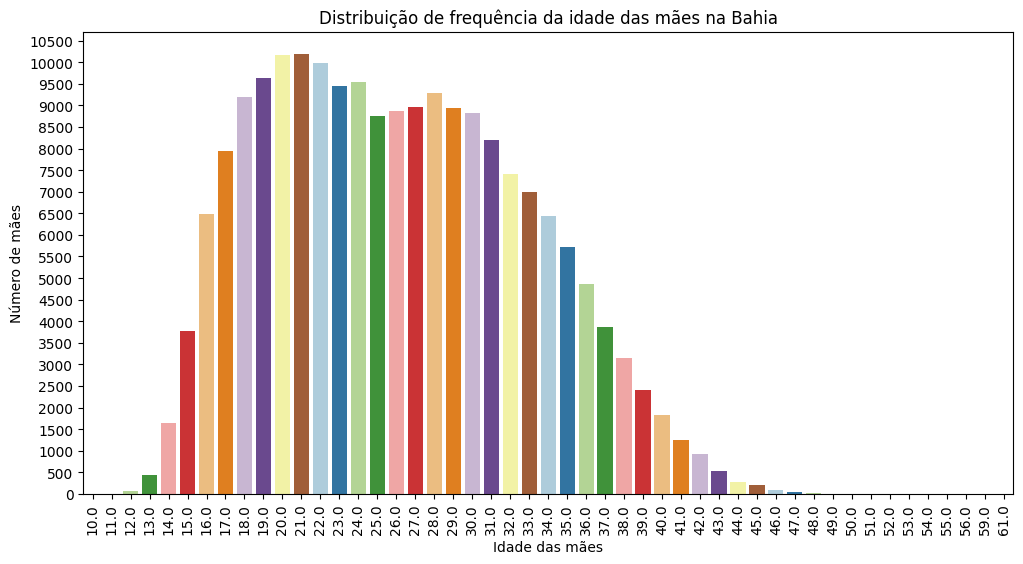

In [18]:
# Converter a série de frequência em um DataFrame para plotagem
frequencia_idade_bahia_df = frequencia_idade_bahia.reset_index()
frequencia_idade_bahia_df.columns = ['Idade das mães', 'Número de mães']

# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Idade das mães', y='Número de mães', data=frequencia_idade_bahia_df, palette='Paired', hue='Idade das mães', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Idade das mães')
plt.ylabel('Número de mães')
plt.title('Distribuição de frequência da idade das mães na Bahia')

# # Definir os ticks do eixo y com intervalo de 50
max_y = frequencia_idade_bahia_df['Número de mães'].max()
plt.yticks(np.arange(0, max_y + 500, 500))

plt.show()

## 5. Mostre a distribuição da variável ‘peso’.

### Segundo o "Declaração de Nascido Vivo: manual de instruções para preenchimento" disponível em [Declaração de Nascido Vivo - Manual de Instruções para Preenchimento](https://svs.aids.gov.br/daent/cgiae/sinasc/documentacao/declaracao-nascido-vivo-manual-instrucoes-preenchimento.pdf) (consulta em 22/07/2024), "4 Peso ao nascer: preencher o peso em gramas (quatro algarismos)." 
### Ao analisar uma amostra da série, constatei várias ocorrências de peso que continham a palavra "obeso" entre a milhar e a centena do peso e ocorrências que terminavam com "gr". 
### Vou tratar essas ocorrências para adequá-las ao padrão de quatro algarismos.


In [19]:
# Converter a coluna 'PESO' em int para poder visualizar a distribuição
coluna_in_peso = sinasc_df['PESO'].value_counts().reset_index()
coluna_in_peso.head(50)

,PESO,count
0,3200,27959
1,3000gr,27443
2,3300,26887
3,3100,26276
4,3400,25264
5,3500,24236
6,3250,20943
7,3150,20147
8,3350,20139
9,3600,19723


In [20]:
# Função para limpar e converter os pesos
def clean_peso(peso):
    peso_str = str(peso)
    # Remover sufixos como 'gr'
    if peso_str.endswith('gr'):
        peso_str = peso_str[:-2]
    # Remover caracteres não numéricos
    clean_peso = ''.join(filter(str.isdigit, peso_str))
    # Verificar se o comprimento é 4 e retornar, caso contrário, retornar None
    return clean_peso if len(clean_peso) == 4 else None

In [21]:
# Aplicar a função de limpeza na coluna PESO
sinasc_df['PESO_LIMPO'] = sinasc_df['PESO'].apply(clean_peso)

In [22]:
# Filtrar apenas os registros com pesos limpos válidos
pesos_validos = sinasc_df[sinasc_df['PESO_LIMPO'].notna()]

In [23]:
# Converter a coluna PESO_LIMPO em campo numérico
sinasc_df['PESO_LIMPO'] = pd.to_numeric(sinasc_df['PESO_LIMPO'], errors='coerce')

In [24]:
# Remover todas as linhas onde consta NaN
sinasc_df = sinasc_df.dropna(subset=['PESO_LIMPO'])

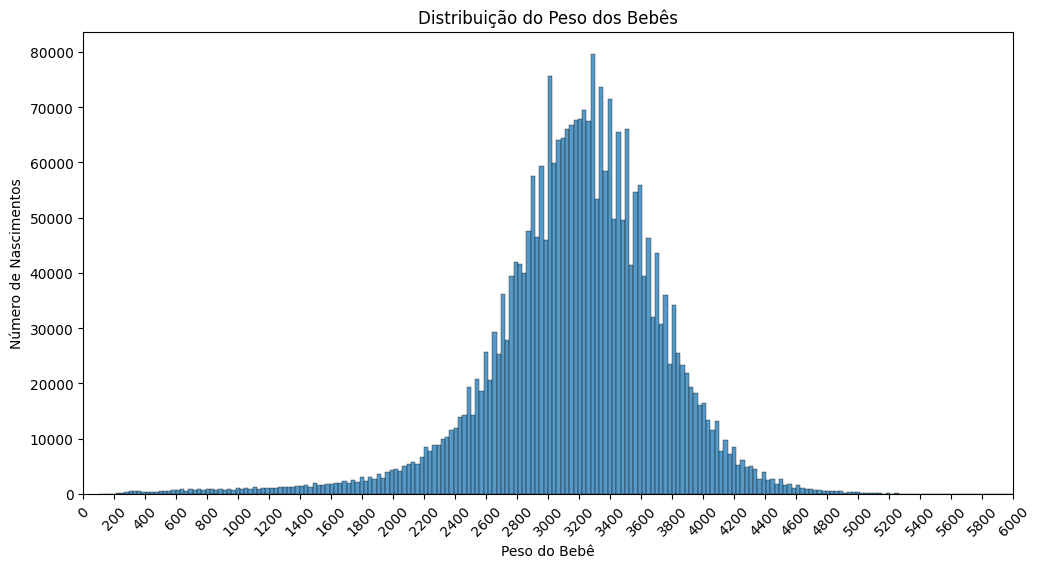

In [25]:
# Plotar o histograma
plt.figure(figsize=(12, 6)) 
sns.histplot(sinasc_df['PESO_LIMPO'], bins=250, kde=False)

plt.xlabel('Peso do Bebê')
plt.ylabel('Número de Nascimentos')
plt.title('Distribuição do Peso dos Bebês')

# Definir os limites do eixo x
plt.xlim(0, 6000)  

# Configurar os rótulos do eixo x
plt.xticks(ticks=range(0, 6001, 200), rotation=45) 

plt.show()

## 6. Quantos bebês nasceram pesando menos de 2000 gramas? (Se necessário, remova inconsistências da variável) e qual a porcentagem desse valor considerando o tamanho da base?


## Critérios para Exclusão de Dados de Peso de Recém-nascidos

Após pesquisas para verificar notícias e/ou registros do menor e maior peso que um recém-nascido foi registrado no Brasil, chegamos a esses dois números para poder eliminar quaisquer registros que estejam fora desse intervalo para essa consulta:

### 1. Recém-nascido com menor peso (335g)

Emanuelly nasceu com 335 gramas e 25 cm no hospital municipal Vila Santa Catarina, em São Paulo. (consulta em 23/07/2024)

[Notícia no UOL](https://noticias.uol.com.br/cotidiano/ultimas-noticias/2023/04/17/menor-bebe-hospital-publico-brasil.htm?cmpid=copiaecola)

### 2. Recém-nascido mais pesado do Brasil (7300g)

Uma mulher deu à luz recentemente um bebê com 59 centímetros de altura e 7,3 quilos. Angerson Santos nasceu de cesariana no Hospital Padre Colombo, em Parintins, no Amazonas. O peso dele excedeu o da recém-nascida mais pesada já registrada, que nasceu com 6,8 kg em 2016. (consulta em 23/07/2024)

[Notícia no MPMT](https://mpmt.mp.br/portalcao/news/728/121115/bebe-de-73-kg-nasce-no-amazonas-quais-os-riscos-de-dar-a-luz-um-filho-gigante/225#:~:text=Uma%20mulher%20deu%20à%20luz,6%2C8%20kg%20em%202016.)


In [26]:
# Marcar valores fora do intervalo como NaN
sinasc_df.loc[(sinasc_df['PESO_LIMPO'] < 335) | (sinasc_df['PESO_LIMPO'] > 7300), 'PESO_LIMPO'] = pd.NA

In [27]:
# Filtrar recém-nascidos com peso abaixo de 2000 gramas
bebes_abaixo_2000g = sinasc_df[sinasc_df['PESO_LIMPO'] < 2000]

In [28]:
# Contar numero de registros de recém-nascidos com peso abaixo de 2000 gramas
numero_bebes_abaixo_2000 = bebes_abaixo_2000g.shape[0]

In [29]:
# Contar número total de registros de bebes 
numero_total_registros = sinasc_df.shape[0]

In [30]:
# Calcular a porcentagem
porcentagem_bebes_abaixo_2000 = (numero_bebes_abaixo_2000 / numero_total_registros) * 100

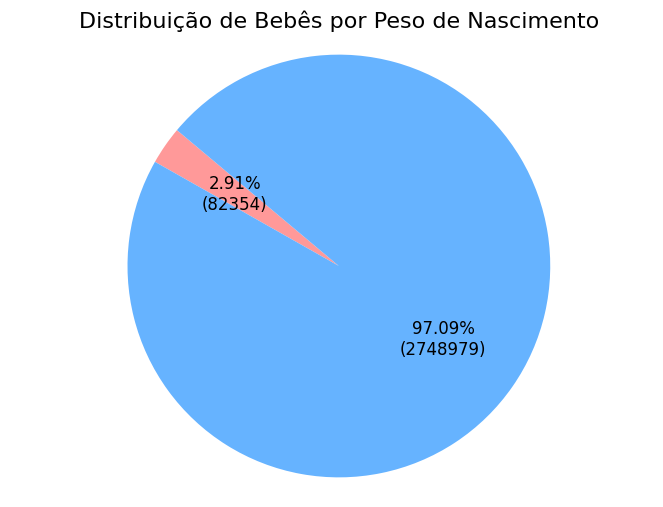

In [31]:
# Dados para o gráfico
labels = ['Menos de 2000g', '2000g ou mais']
sizes = [numero_bebes_abaixo_2000, numero_total_registros - numero_bebes_abaixo_2000]
percentages = [porcentagem_bebes_abaixo_2000, 100 - porcentagem_bebes_abaixo_2000]
colors = ['#ff9999','#66b3ff']

# Rótulos personalizados para cada fatia
def autopct(pct):
    total = sum(sizes)
    val = int(pct * total / 100.0)
    return f'{pct:.2f}%\n({val})'

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct=autopct, startangle=140, textprops=dict(color="w"))

# Ajustar propriedades dos textos
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)

plt.title('Distribuição de Bebês por Peso de Nascimento', fontsize=16)
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo.

# Exibir o gráfico
plt.show()

In [32]:
# Exibir os resultados
print(f"Número de recém-nascidos pesando menos de 2000 gramas: {numero_bebes_abaixo_2000}")
print(f"Porcentual de recém-nascidos pesando menos de 2000 gramas: {porcentagem_bebes_abaixo_2000:.2f}%")

Número de recém-nascidos pesando menos de 2000 gramas: 82354
Porcentual de recém-nascidos pesando menos de 2000 gramas: 2.91%


## 7. Quantos estabelecimentos de saúde o banco de dados contém em cada UF?


In [33]:
# Contar a distribuição de estabelecimentos de saúde por UF
coluna_estabalecimentos_uf = sinasc_df.groupby('UF_NOME')['CODESTAB'].nunique().reset_index()
coluna_estabalecimentos_uf.columns = ['UF', 'Número de Estabelecimentos de Saúde']

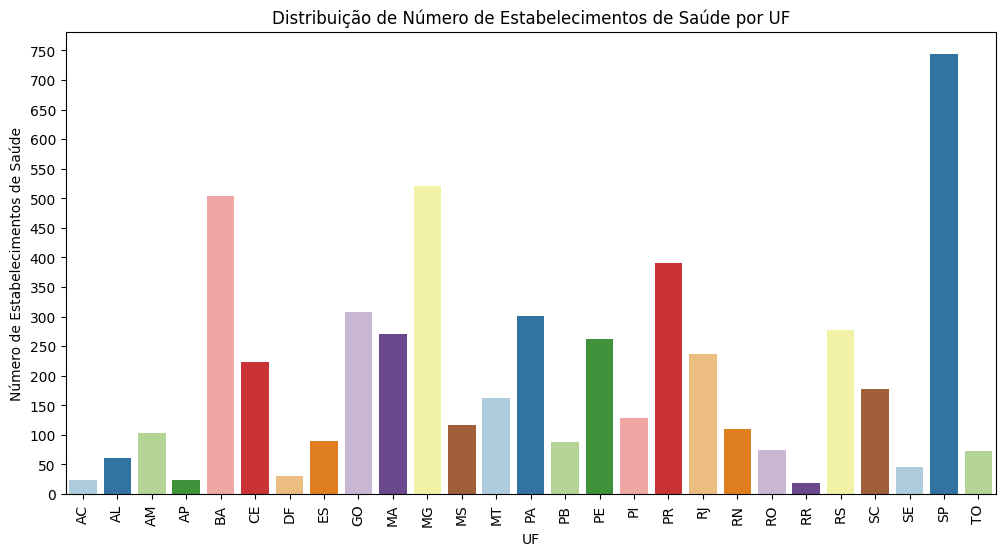

In [34]:
# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Número de Estabelecimentos de Saúde', data=coluna_estabalecimentos_uf, palette=paleta, hue='UF', legend=False)
plt.xticks(rotation=90)
plt.xlabel('UF')
plt.ylabel('Número de Estabelecimentos de Saúde')
plt.title('Distribuição de Número de Estabelecimentos de Saúde por UF')

# Definir os ticks do eixo y com intervalo de 50
max_y = coluna_estabalecimentos_uf['Número de Estabelecimentos de Saúde'].max()
plt.yticks(np.arange(0, max_y + 50, 50))

plt.show()

## 8. Quantas crianças nasceram em hospital na Bahia?


### Conforme o Declaração de Nascido Vivo: manual de instruções para preenchimento, a nomenclatura para local de nascimento é LOCNASC

#### Local de nascimento: 1 – Hospital; 2 – Outros estabelecimentos de saúde; 3 – Domicílio; 4 – Outros.

In [35]:
# Selecionar os nascidos no estado da Bahia (codigo UF = 29) e que tenham ocorrido em hospitais (1 – Hospital)
nascidos_hospital_bahia = sinasc_df[(sinasc_df['UF_CODIGO'] == '29') & (sinasc_df['LOCNASC'] == 1)]

In [36]:
# Contar os registros
quantidade_nascidos_hospital_bahia = nascidos_hospital_bahia.shape[0]

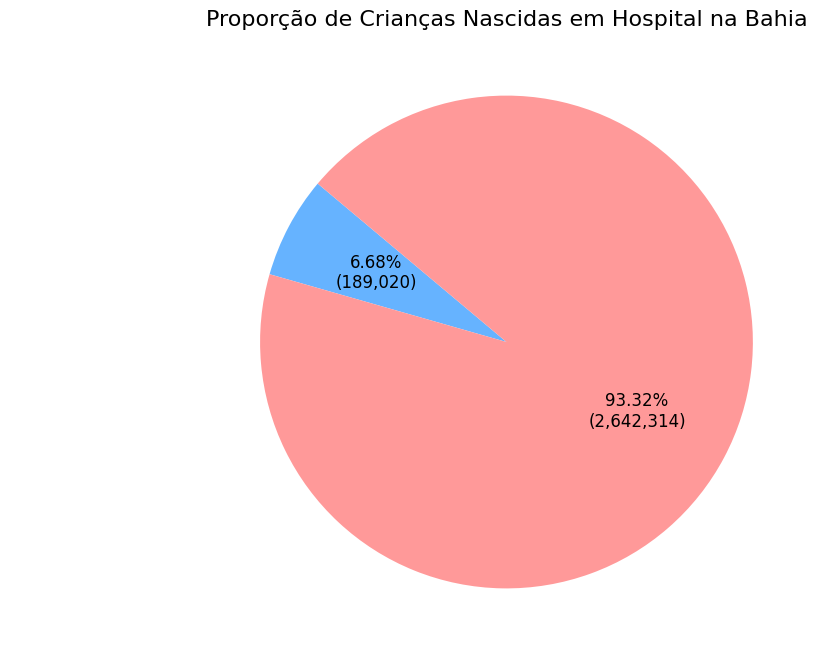

In [37]:
# Dados para o gráfico
labels = ['Nascidos em Hospital na Bahia', 'Outros']
sizes = [quantidade_nascidos_hospital_bahia, sinasc_df.shape[0] - quantidade_nascidos_hospital_bahia]
colors = ['#66b3ff', '#ff9999']

# Função para exibir rótulos personalizados com valores exatos
def autopct(pct):
    total = sum(sizes)
    val = int(pct * total / 100.0)
    return f'{pct:.2f}%\n({val:,})'  # Adiciona separador de milhar

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct=autopct, startangle=140, textprops=dict(color="w"))

# Ajustar propriedades dos textos
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)

plt.title('Proporção de Crianças Nascidas em Hospital na Bahia', fontsize=16)

# Exibir o gráfico
plt.show()

In [38]:
# Imprimir o resultado
print(f"Número de bebês que nasceram em hospital na Bahia: {quantidade_nascidos_hospital_bahia}")

Número de bebês que nasceram em hospital na Bahia: 189020


## 9. Quantas crianças nasceram em casa na Bahia?

In [39]:
# Selecionar os nascidos no estado da Bahia (codigo UF = 29) e que tenham ocorrido em hospitais (3 – Casa)
nascidos_casa_bahia = sinasc_df[(sinasc_df['UF_CODIGO'] == '29') & (sinasc_df['LOCNASC'] == 3)]

In [40]:
# Contar os registros
quantidade_nascidos_casa_bahia = nascidos_casa_bahia.shape[0]

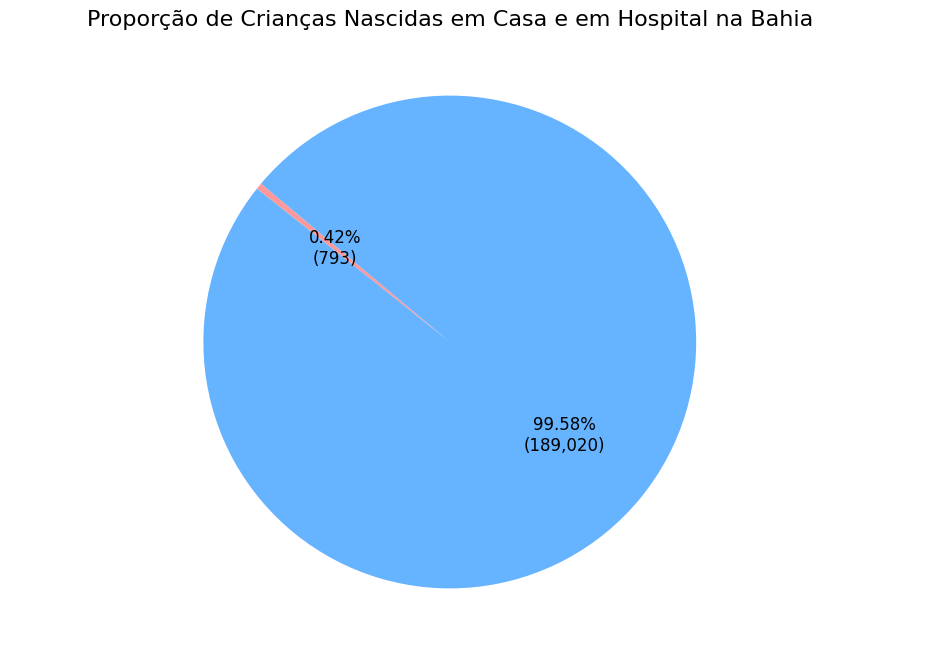

In [41]:
# Dados para o gráfico
nascidos_hospital_bahia = sinasc_df[(sinasc_df['UF_CODIGO'] == '29') & (sinasc_df['LOCNASC'] == 1)]
quantidade_nascidos_hospital_bahia = nascidos_hospital_bahia.shape[0]

# Selecionar os nascidos no estado da Bahia e que tenham ocorrido em casa (3 – Casa)
nascidos_casa_bahia = sinasc_df[(sinasc_df['UF_CODIGO'] == '29') & (sinasc_df['LOCNASC'] == 3)]
quantidade_nascidos_casa_bahia = nascidos_casa_bahia.shape[0]

# Dados para o gráfico
labels = ['Nascidos em Casa na Bahia', 'Nascidos em Hospital na Bahia']
sizes = [quantidade_nascidos_casa_bahia, quantidade_nascidos_hospital_bahia]
colors = ['#ff9999', '#66b3ff']

# Função para exibir rótulos personalizados com valores exatos
def autopct(pct):
    total = sum(sizes)
    val = int(pct * total / 100.0)
    return f'{pct:.2f}%\n({val:,})'  # Adiciona separador de milhar

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct=autopct, startangle=140, textprops=dict(color="w"))

# Ajustar propriedades dos textos
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)

plt.title('Proporção de Crianças Nascidas em Casa e em Hospital na Bahia', fontsize=16)

# Exibir o gráfico
plt.show()

In [42]:
# Imprimir o resultado
print(f"Número de bebês que nasceram em casa na Bahia: {quantidade_nascidos_casa_bahia}")

Número de bebês que nasceram em casa na Bahia: 793


## 10. Mostre a distribuição de nascimentos por mês na Bahia.


In [43]:
# Filtrando oa registros do estado da Bahia
sinasc_bahia = sinasc_df[sinasc_df['UF_CODIGO'] == '29'].copy()

In [44]:
# Extrair o mês de nascimento dos nascidos na Bahia
sinasc_bahia.loc[:, 'MES_NASC'] = sinasc_bahia['DTNASC'].dt.month

In [45]:
# Contar o número de nascimentos por mês na Bahia
distribuicao_mensal_bahia = sinasc_bahia['MES_NASC'].value_counts().sort_index()


In [46]:
# Criar um DataFrame para a distribuição mensal
distribuicao_mensal_bahia_df = distribuicao_mensal_bahia.reset_index()
distribuicao_mensal_bahia_df.columns = ['MES_NASC', 'NUM_NASCIMENTOS']


In [47]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

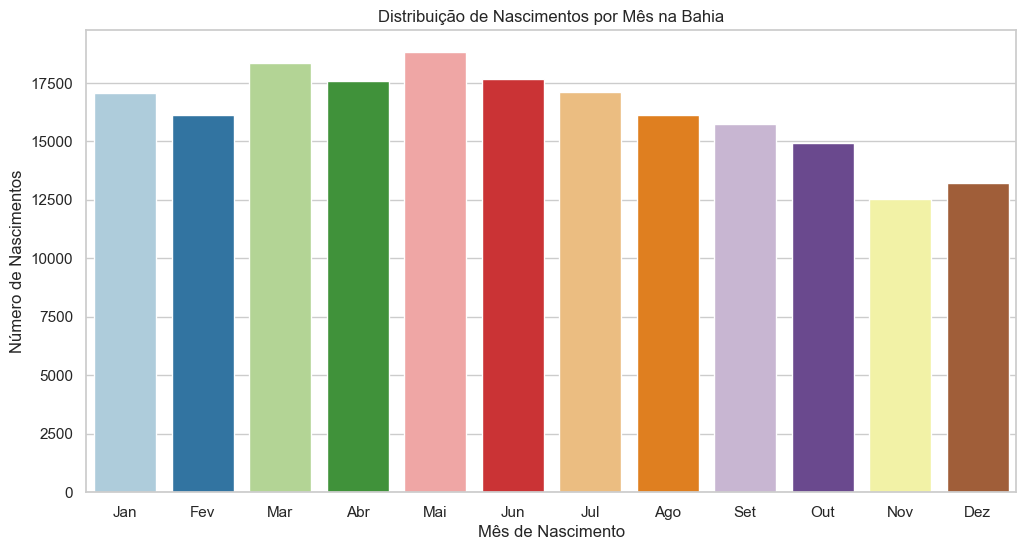

In [48]:
# Plotar o gráfico de barras para a Bahia
plt.figure(figsize=(12, 6))
sns.barplot(x='MES_NASC', y='NUM_NASCIMENTOS', data=distribuicao_mensal_bahia_df, hue='MES_NASC' , palette='Paired', legend=False)
plt.xlabel('Mês de Nascimento')
plt.ylabel('Número de Nascimentos')
plt.title('Distribuição de Nascimentos por Mês na Bahia')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()


## 11. Mostre a distribuição de escolaridade de mães solteiras, negras e pardas para cada UF.

### Conforme o Declaração de Nascido Vivo: manual de instruções para preenchimento, a nomenclatura para:

#### Escolaridade é ESCMAE, em anos de estudo concluídos: 
1 – Nenhuma | 2 – 1 a 3 anos | 3 – 4 a 7 anos | 4 – 8 a 11 anos | 5 – 12 e mais | 9 – Ignorado
#### Estado civil é ESTCIVMAE: 
1 – Solteira | 2 – Casada | 3 – Viúva | 4 – Separada judicialmente/divorciada | 5 – União estável | 9 – Ignorada. 
#### Tipo de raça e cor da mãe é RACACORMAE: 
1 – Branca | 2 – Preta | 3 – Amarela | 4 – Parda | 5 – Indígena.

#### 1ª observação: Durante a exploração dos dados constatei registros com valores '0' e NaN na coluna ESCMAE2010, como esses valores não constam na tabela, converti para 0 e esses registros estão categorizados como "0 - Desconhecido" na legenda do gráfico, foram diversas tentativas de incluir as informações na caixa da legenda, optei por incluir como subtítulo do gráfico

#### 2ª observação: Não realizei a filtragem dos dados das colunas de estado civil e de raça e cor até o momento. Sei que essa informação deve ser tratada porém ainda tenho as tarefas 12 e 13 para concluir antes do prazo. 

#### 3ª observação: um ponto aqui a ser melhorado da minha parte é estudar mais esse contéudo para tomar as decisões de descartar registros inconsistentes ou não, que acredito com o estágio vou poder adquirir mais confiança e experiência.

In [49]:
# Substituir valores 0 por NaN na coluna ESCMAE2010
sinasc_df['ESCMAE2010'] = sinasc_df['ESCMAE2010'].replace(np.nan, 0.0)

# Selecionar mães solteiras, negras e pardas
maes_solteiras_np = sinasc_df[
    (sinasc_df['ESTCIVMAE'] == 1) &
    ((sinasc_df['RACACORMAE'] == 2) | (sinasc_df['RACACORMAE'] == 4))
].copy()

In [50]:
# Contar a distribuição de escolaridade por UF
distribuicao_escolaridade = maes_solteiras_np.groupby(['UF_NOME', 'ESCMAE2010']).size().unstack(fill_value=0)

# Resetar o índice para preparar os dados para o gráfico
distribuicao_escolaridade_reset = distribuicao_escolaridade.reset_index().melt(id_vars='UF_NOME', var_name='Escolaridade', value_name='Contagem')


# Preparar os dados para o gráfico
distribuicao_escolaridade_plot = distribuicao_escolaridade_reset.pivot(index="UF_NOME", columns="Escolaridade", values="Contagem").fillna(0)


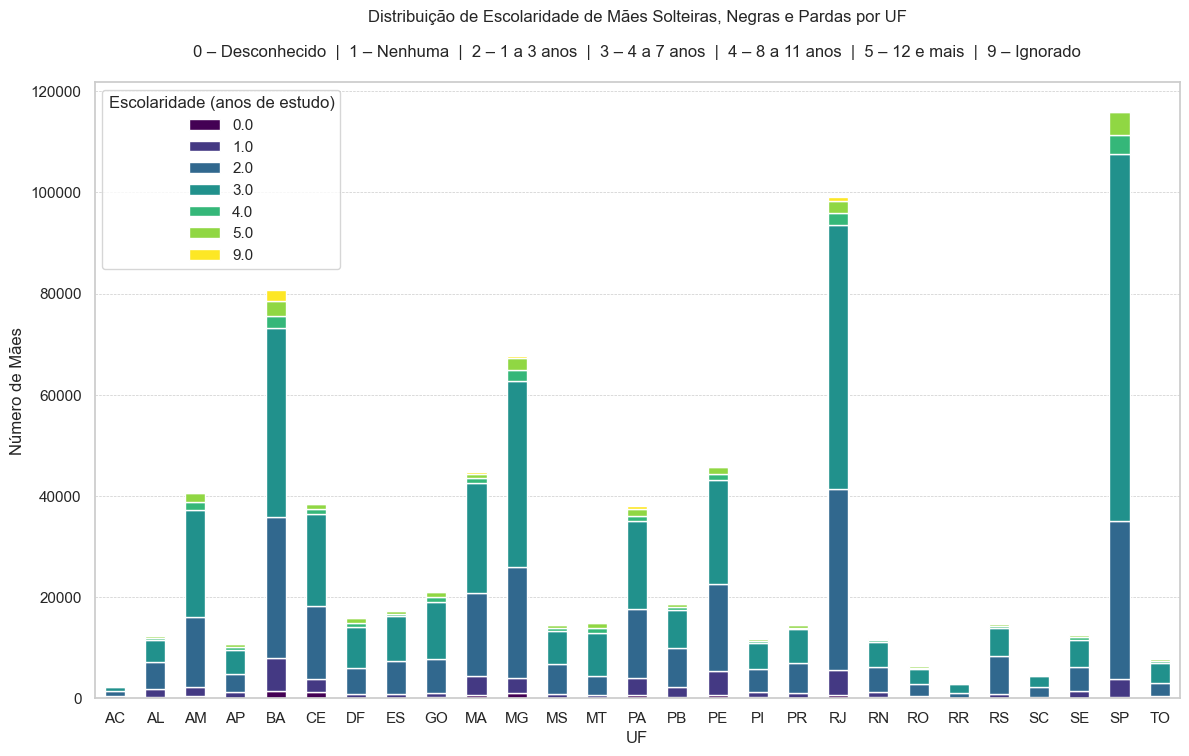

In [51]:
# Criar o gráfico de barras empilhadas
ax = distribuicao_escolaridade_plot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
title_text = (
    'Distribuição de Escolaridade de Mães Solteiras, Negras e Pardas por UF\n\n'
    '0 – Desconhecido  |  1 – Nenhuma  |  2 – 1 a 3 anos  |  3 – 4 a 7 anos  |  '
    '4 – 8 a 11 anos  |  5 – 12 e mais  |  9 – Ignorado\n'
)
plt.title(title_text, fontsize=12)
plt.xlabel('UF')
plt.ylabel('Número de Mães')
plt.xticks(rotation=0)

# Atualizar a legenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Escolaridade (anos de estudo)')

# Definir a frequência das linhas de grade no eixo y com valores inteiros
ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.xaxis.grid(False)

# Mostrar o gráfico
plt.show()

## 12. Qual a porcentagem de mulheres casadas que tiveram parto vaginal com menos de 37 semanas de gestação?
##### GESTACAO:
1 – Menos de 22 semanas | 2 – 22 a 27 semanas | 3 – 28 a 31 semanas | 4 – 32 a 36 semanas | 5 – 37 a 41 semanas | 6 – 42 semanas e mais | 9 – Ignorado

##### ESTCIVMAE: 
1 – Solteira | 2 – Casada | 3 – Viúva | 4 – Separada judicialmente/divorciada | 5 – União estável | 9 – Ignorada. 

##### PARTO:
1 – Vaginal | 2 – Cesário | 9 – Ignorado
#### Para fins de cálculo da porcentagem utilizei como base o total de registros

In [52]:
# Selecionar mães casadas que tiveram parto vaginal com menos de 37 semanas de gestação
maes_casadas_vaginal_menos_37 = sinasc_df[
    (sinasc_df['ESTCIVMAE'] == 2) & 
    (sinasc_df['PARTO'] == 1) & 
    (
        (sinasc_df['GESTACAO'] == 1) | 
        (sinasc_df['GESTACAO'] == 2) | 
        (sinasc_df['GESTACAO'] == 3) | 
        (sinasc_df['GESTACAO'] == 4)
    )
].copy()


In [53]:
# Contar número de mães casadas que tiveram parto vaginal com menos de 37 semanas de gestação
numero_maes_casadas_vaginal_menos_37 = maes_casadas_vaginal_menos_37.shape[0]

# Contar número total de registros
total_de_registros = sinasc_df.shape[0]

In [55]:
# Calcular a porcentagem de mães casadas que tiveram parto vaginal com menos de 37 semanas de gestação
porcentagem = (numero_maes_casadas_vaginal_menos_37 / total_de_registros) * 100

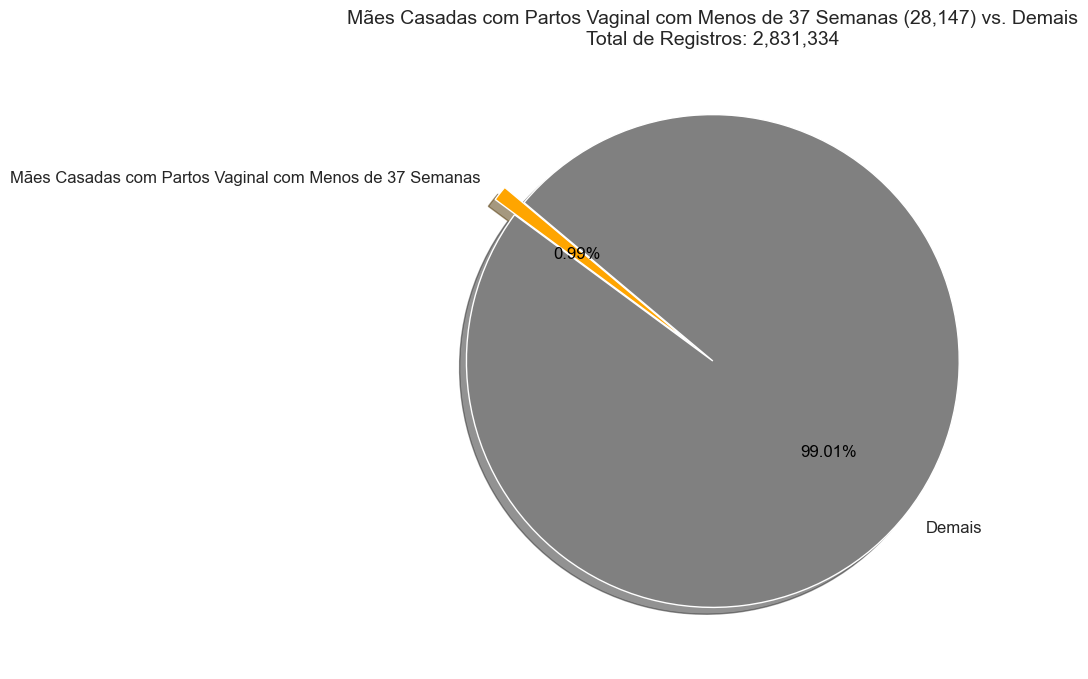

In [56]:
# Dados para o gráfico
labels = ['Mães Casadas com Partos Vaginal com Menos de 37 Semanas', 'Demais']
sizes = [numero_maes_casadas_vaginal_menos_37, total_de_registros - numero_maes_casadas_vaginal_menos_37]
colors = ['orange', 'grey']
explode = (0.1, 0)  # Destacar a primeira fatia

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.2f%%',
    shadow=True,
    startangle=140
)

# Ajustar o formato dos textos e porcentagens
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')

# Adicionar título
ax.set_title(f'Mães Casadas com Partos Vaginal com Menos de 37 Semanas ({numero_maes_casadas_vaginal_menos_37:,}) vs. Demais\nTotal de Registros: {total_de_registros:,}', fontsize=14)

plt.show()




## 13. E em relação às mulheres que tiveram parto cesárea, qual a porcentagem?
###  A porcentagem de mulheres casadas que tiveram parto cesárea com menos de 37 semanas de gestação


In [57]:
# Selecionar mães casadas que tiveram parto cesarea com menos de 37 semanas de gestação
maes_casadas_cesarea_menos_37 = sinasc_df[
    (sinasc_df['ESTCIVMAE'] == 2) & 
    (sinasc_df['PARTO'] == 2) & 
    (
        (sinasc_df['GESTACAO'] == 1) | 
        (sinasc_df['GESTACAO'] == 2) | 
        (sinasc_df['GESTACAO'] == 3) | 
        (sinasc_df['GESTACAO'] == 4)
    )
].copy()

In [58]:
# Contar número de mães casadas que tiveram parto cesárea com menos de 37 semanas de gestação
numero_maes_casadas_cesarea_menos_37 = maes_casadas_cesarea_menos_37.shape[0]

# Contar número total de registros
numero_total_de_registros = sinasc_df.shape[0]

In [59]:
# Calcular a porcentagem de mães casadas que tiveram parto cesárea com menos de 37 semanas de gestação
porcentagem_maes_casadas_vaginal_menos_37 = (numero_maes_casadas_cesarea_menos_37 / numero_total_de_registros) * 100

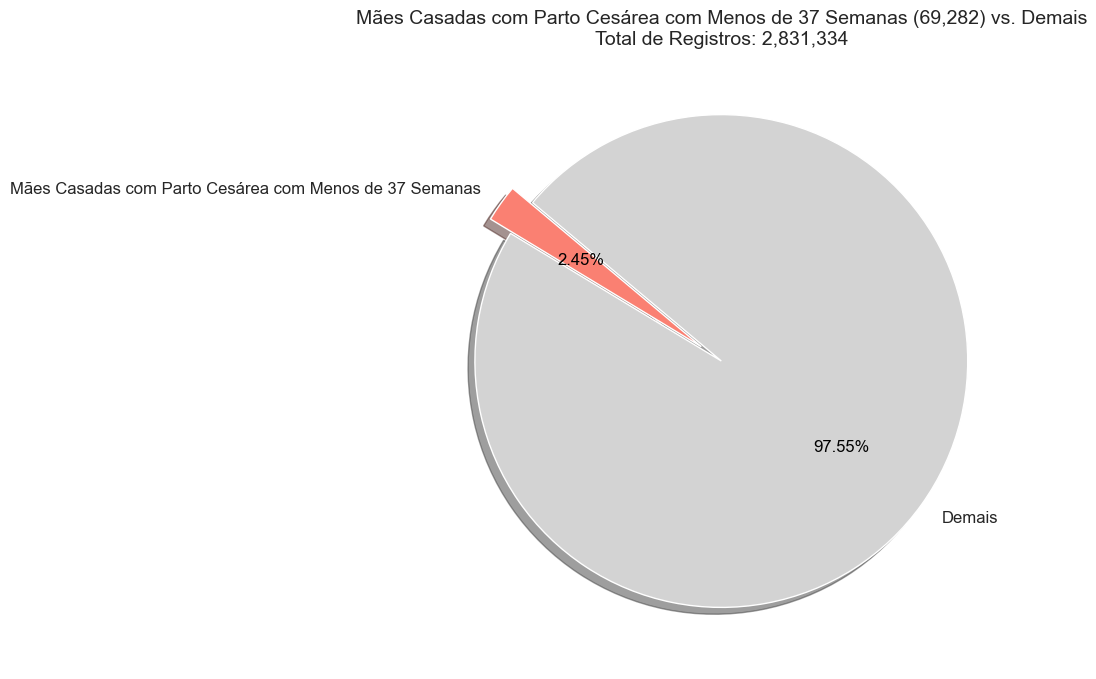

In [60]:
# Dados para o gráfico
labels = ['Mães Casadas com Parto Cesárea com Menos de 37 Semanas', 'Demais']
sizes = [numero_maes_casadas_cesarea_menos_37, numero_total_de_registros - numero_maes_casadas_cesarea_menos_37]
colors = ['salmon', 'lightgrey']  # Cores diferentes do gráfico anterior
explode = (0.1, 0)  # Destacar a primeira fatia

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.2f%%',
    shadow=True,
    startangle=140
)

# Ajustar o formato dos textos e porcentagens
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')

# Adicionar título
ax.set_title(f'Mães Casadas com Parto Cesárea com Menos de 37 Semanas ({numero_maes_casadas_cesarea_menos_37:,}) vs. Demais\nTotal de Registros: {numero_total_de_registros:,}', fontsize=14)

plt.show()
